# Tutorial to use pipelines

In [3]:
import sys
sys.path.append('c:\\Users\\rokas\\Documents\\GitHub\\BCI\\mi-bci\\code')

# Import ml_pipelines from the file you saved earlier
from pipelines.ml_pipelines import moabb_pipelines
from evaluation import train_and_evaluate

from helper_functions import setup_logger, load_procesed_data
from helper_functions import process_mi_epochs
from datasets import Lee2019
import os

In [4]:

log = setup_logger("Lee_pipelines", log_file=os.path.join("logs","Lee_pipelines.log"))
dataset = Lee2019()
dataset_no = 20
paradigm = "MI"
subject = 4
run = 1
data = load_procesed_data(dataset_no, paradigm, subject, run, include=['epochs_raw'])
#data = load_procesed_data(dataset_no, paradigm, subject, run, include=['epochs_raw', 'epochs_raw_autoreject'])
epochs = data["epochs_raw"]
epochs_p = process_mi_epochs(epochs)

Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\procesed\20\MI\4\1\s04.01_epochs_raw-epo.fif ...
    Found the data of interest:
        t =   -1200.00 ...    5200.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB



In [ ]:
from helper_functions import preprocess_raw_autoreject
raw = dataset.load_one_raw_fif(subject=subject,paradigm=paradigm,run=run)
event_id = dict(left_hand=2, right_hand=1)
tmin = -1.2
tmax = 5.2
epochs_autoreject = preprocess_raw_autoreject(raw, event_id=event_id, tmin=tmin, tmax=tmax, preloaded=False) #Fun can return epoched raw if include_raw argument is provided.

Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s04.01_raw.fif...
    Range : 0 ... 1384719 =      0.000 ...  1384.719 secs
Ready.
Reading 0 ... 1384719  =      0.000 ...  1384.719 secs...
100 events found on stim channel STI 014
Event IDs: [1 2]
Not setting metadata
100 matching events found
Setting baseline interval to [-1.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 6401 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 6401 original time points ...
Using data from preloaded Raw for 100 events and 6401 original time points ...
Reading c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\temp\epochs_raw-epo.fif ...
    Found the data of interest:
        t =   -1200.00 ...    5200.00 ms
        0 CTF compensation matrices available
Not setting metadata
100 matching events found
No baseline correction applied
0 projection items 

  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/100 [00:00<?,       ?it/s]

Dropped 5 epochs: 33, 64, 70, 79, 92


------------------ intarpas ------------------

In [43]:
dataset = Lee2019()
times = []
for x in range(1,54):
    for y in [1,2]:
        try:
            raw = dataset.load_one_raw_fif(subject=x,paradigm='MI', run=y)
            duration_seconds = raw.n_times / raw.info['sfreq']
            duration_minutes = duration_seconds / 60
            times.append(duration_minutes)
        except AttributeError:
            continue
    

Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s01.01_raw.fif...
    Range : 0 ... 1418039 =      0.000 ...  1418.039 secs
Ready.
Reading 0 ... 1418039  =      0.000 ...  1418.039 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s01.02_raw.fif...
    Range : 0 ... 1519159 =      0.000 ...  1519.159 secs
Ready.
Reading 0 ... 1519159  =      0.000 ...  1519.159 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s02.01_raw.fif...
    Range : 0 ... 1434799 =      0.000 ...  1434.799 secs
Ready.
Reading 0 ... 1434799  =      0.000 ...  1434.799 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s02.02_raw.fif...
    Range : 0 ... 1373919 =      0.000 ...  1373.919 secs
Ready.
Reading 0 ... 1373919  =      0.000 ...  1373.919 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s03.01_raw.fif..

2025-01-22 18:23:48,884 - Lee2019 - ERROR - Failed to load raw data for subject 39: fname does not exist: "c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s39.01_raw.fif"


Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s39.02_raw.fif...


2025-01-22 18:23:48,928 - Lee2019 - ERROR - Failed to load raw data for subject 39: fname does not exist: "c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s39.02_raw.fif"


Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s40.01_raw.fif...
    Range : 0 ... 1439359 =      0.000 ...  1439.359 secs
Ready.
Reading 0 ... 1439359  =      0.000 ...  1439.359 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s40.02_raw.fif...
    Range : 0 ... 1452919 =      0.000 ...  1452.919 secs
Ready.
Reading 0 ... 1452919  =      0.000 ...  1452.919 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s41.01_raw.fif...
    Range : 0 ... 1385519 =      0.000 ...  1385.519 secs
Ready.
Reading 0 ... 1385519  =      0.000 ...  1385.519 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s41.02_raw.fif...
    Range : 0 ... 1447119 =      0.000 ...  1447.119 secs
Ready.
Reading 0 ... 1447119  =      0.000 ...  1447.119 secs...
Opening raw data file c:\Users\rokas\Documents\GitHub\BCI\mi-bci\data\raw_fif\20\MI\s42.01_raw.fif..

In [50]:
import numpy as np
np.mean(times)

23.8603782051282

In [26]:
duration_seconds = raw.n_times / raw.info['sfreq']

# Convert to minutes or hours if needed
duration_minutes = duration_seconds / 60
duration_hours = duration_minutes / 60

In [28]:
duration_minutes

22.790000000000003

------------- intarpo pabaiga ------------------

In [4]:
results_clean = train_and_evaluate(epochs_autoreject, moabb_pipelines, n_splits=5, log=log)

2025-01-07 17:12:03,583 - Lee_pipelines - INFO - Begining training and evaluating pipelines
2025-01-07 17:12:03,826 - Lee_pipelines - INFO - Original epochs shape: (95, 67, 6401), using epochs_train shape: (95, 67, 2501)
2025-01-07 17:12:03,826 - Lee_pipelines - INFO - Evaluating pipeline: ACM_TS_SVM
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\pyriemann\utils\base.py:73: RuntimeWarning: divide by zero encountered in divide
  def isqrt(x): return 1. / np.sqrt(x)
c:\Users\rokas\Documents\GitHub\BCI\mi-bci\.pixi\envs\default\lib\site-packages\pyriemann\utils\base.py:21: RuntimeWarning: invalid value encountered in multiply
  D = (eigvecs * eigvals) @ np.swapaxes(eigvecs.conj(), -2, -1)
2025-01-07 17:12:04,586 - Lee_pipelines - ERROR - An error occurred in pipeline ACM_TS_SVM: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failure

Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0023 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed f

2025-01-07 17:12:12,594 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:12:12,610 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:12:12,611 - Lee_pipelines - INFO - Validation Accuracy: 0.4737, Validation AUC: 0.4778
2025-01-07 17:12:12,611 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:12:12,611 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:12:12,611 - Lee_pipelines - INFO - Validation Accuracy: 0.5789, Validation AUC: 0.7222
2025-01-07 17:12:12,611 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:12:12,611 - Lee_pipelines - INFO - Training Accuracy: 0.9737, Training AUC: 0.9986
2025-01-07 17:12:12,611 - Lee_pipelines - INFO - Validation Accuracy: 0.7895, Validation AUC: 0.8000
2025-01-07 17:12:12,615 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:12:12,616 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:12:12,6

Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0023 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed f

2025-01-07 17:12:20,154 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:12:20,155 - Lee_pipelines - INFO - Training Accuracy: 0.9737, Training AUC: 1.0000
2025-01-07 17:12:20,155 - Lee_pipelines - INFO - Validation Accuracy: 0.4211, Validation AUC: 0.4889
2025-01-07 17:12:20,156 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:12:20,157 - Lee_pipelines - INFO - Training Accuracy: 0.9868, Training AUC: 1.0000
2025-01-07 17:12:20,157 - Lee_pipelines - INFO - Validation Accuracy: 0.6842, Validation AUC: 0.7556
2025-01-07 17:12:20,158 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:12:20,159 - Lee_pipelines - INFO - Training Accuracy: 0.9737, Training AUC: 0.9979
2025-01-07 17:12:20,159 - Lee_pipelines - INFO - Validation Accuracy: 0.6842, Validation AUC: 0.8444
2025-01-07 17:12:20,159 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:12:20,159 - Lee_pipelines - INFO - Training Accuracy: 0.9868, Training AUC: 1.0000
2025-01-07 17:12:20,1

Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0023 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed f

2025-01-07 17:12:34,742 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - Validation Accuracy: 0.4211, Validation AUC: 0.4778
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - Training Accuracy: 0.9868, Training AUC: 1.0000
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - Validation Accuracy: 0.7895, Validation AUC: 0.7667
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - Training Accuracy: 0.9737, Training AUC: 0.9965
2025-01-07 17:12:34,743 - Lee_pipelines - INFO - Validation Accuracy: 0.6842, Validation AUC: 0.8333
2025-01-07 17:12:34,748 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:12:34,749 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:12:34,7

Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0023 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed from 67 data channels with 0 projectors
    Setting small data eigenvalues to zero (without PCA)
Reducing data rank from 67 -> 66
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0022 (2.2e-16 eps * 67 dim * 1.5e+11  max singular value)
    Estimated rank (data): 66
    data: rank 66 computed f

2025-01-07 17:12:44,702 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:12:44,707 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:12:44,707 - Lee_pipelines - INFO - Validation Accuracy: 0.4211, Validation AUC: 0.4778
2025-01-07 17:12:44,707 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:12:44,709 - Lee_pipelines - INFO - Training Accuracy: 0.9868, Training AUC: 1.0000
2025-01-07 17:12:44,709 - Lee_pipelines - INFO - Validation Accuracy: 0.7895, Validation AUC: 0.7667
2025-01-07 17:12:44,710 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:12:44,710 - Lee_pipelines - INFO - Training Accuracy: 0.9737, Training AUC: 0.9965
2025-01-07 17:12:44,710 - Lee_pipelines - INFO - Validation Accuracy: 0.6842, Validation AUC: 0.8333
2025-01-07 17:12:44,712 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:12:44,714 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:12:44,7

In [8]:
results = train_and_evaluate(epochs_p, moabb_pipelines, n_splits=5, log=log)

2025-01-07 17:16:03,453 - Lee_pipelines - INFO - Begining training and evaluating pipelines
2025-01-07 17:16:03,518 - Lee_pipelines - INFO - Original epochs shape: (100, 20, 6401), using epochs_train shape: (100, 20, 2501)
2025-01-07 17:16:03,519 - Lee_pipelines - INFO - Evaluating pipeline: ACM_TS_SVM
2025-01-07 17:16:04,115 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:16:04,115 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:16:04,117 - Lee_pipelines - INFO - Validation Accuracy: 0.4500, Validation AUC: 0.5300
2025-01-07 17:16:04,117 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:16:04,117 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training AUC: 1.0000
2025-01-07 17:16:04,117 - Lee_pipelines - INFO - Validation Accuracy: 0.6500, Validation AUC: 0.6700
2025-01-07 17:16:04,117 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:16:04,121 - Lee_pipelines - INFO - Training Accuracy: 1.0000, Training

Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMP

2025-01-07 17:16:06,108 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:16:06,108 - Lee_pipelines - INFO - Training Accuracy: 0.5750, Training AUC: 0.5887
2025-01-07 17:16:06,113 - Lee_pipelines - INFO - Validation Accuracy: 0.4500, Validation AUC: 0.4100
2025-01-07 17:16:06,114 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:16:06,114 - Lee_pipelines - INFO - Training Accuracy: 0.6375, Training AUC: 0.6362
2025-01-07 17:16:06,115 - Lee_pipelines - INFO - Validation Accuracy: 0.5000, Validation AUC: 0.4500
2025-01-07 17:16:06,115 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:16:06,115 - Lee_pipelines - INFO - Training Accuracy: 0.6500, Training AUC: 0.6375
2025-01-07 17:16:06,117 - Lee_pipelines - INFO - Validation Accuracy: 0.3500, Validation AUC: 0.4200
2025-01-07 17:16:06,117 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:16:06,118 - Lee_pipelines - INFO - Training Accuracy: 0.9250, Training AUC: 0.9656
2025-01-07 17:16:06,1

Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMP

2025-01-07 17:16:07,850 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:16:07,850 - Lee_pipelines - INFO - Training Accuracy: 0.4500, Training AUC: 0.4769
2025-01-07 17:16:07,850 - Lee_pipelines - INFO - Validation Accuracy: 0.6500, Validation AUC: 0.6900
2025-01-07 17:16:07,855 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:16:07,856 - Lee_pipelines - INFO - Training Accuracy: 0.5875, Training AUC: 0.5419
2025-01-07 17:16:07,856 - Lee_pipelines - INFO - Validation Accuracy: 0.4500, Validation AUC: 0.5100
2025-01-07 17:16:07,857 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:16:07,857 - Lee_pipelines - INFO - Training Accuracy: 0.5625, Training AUC: 0.5700
2025-01-07 17:16:07,857 - Lee_pipelines - INFO - Validation Accuracy: 0.4000, Validation AUC: 0.3800
2025-01-07 17:16:07,857 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:16:07,857 - Lee_pipelines - INFO - Training Accuracy: 0.9250, Training AUC: 0.9481
2025-01-07 17:16:07,8

Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMP

2025-01-07 17:16:13,375 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:16:13,375 - Lee_pipelines - INFO - Training Accuracy: 0.5000, Training AUC: 0.5212
2025-01-07 17:16:13,375 - Lee_pipelines - INFO - Validation Accuracy: 0.7000, Validation AUC: 0.7000
2025-01-07 17:16:13,375 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:16:13,380 - Lee_pipelines - INFO - Training Accuracy: 0.6125, Training AUC: 0.6269
2025-01-07 17:16:13,381 - Lee_pipelines - INFO - Validation Accuracy: 0.4500, Validation AUC: 0.5100
2025-01-07 17:16:13,381 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:16:13,382 - Lee_pipelines - INFO - Training Accuracy: 0.6125, Training AUC: 0.6244
2025-01-07 17:16:13,383 - Lee_pipelines - INFO - Validation Accuracy: 0.4500, Validation AUC: 0.4200
2025-01-07 17:16:13,383 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:16:13,383 - Lee_pipelines - INFO - Training Accuracy: 0.9000, Training AUC: 0.9531
2025-01-07 17:16:13,3

Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2.5e-05 (2.2e-16 eps * 20 dim * 5.7e+09  max singular value)
    Estimated rank (data): 20
    data: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating class=0 covariance using EMP

2025-01-07 17:16:17,984 - Lee_pipelines - INFO - ======= Fold 0 =======
2025-01-07 17:16:17,984 - Lee_pipelines - INFO - Training Accuracy: 0.5000, Training AUC: 0.5212
2025-01-07 17:16:17,984 - Lee_pipelines - INFO - Validation Accuracy: 0.7000, Validation AUC: 0.7000
2025-01-07 17:16:17,984 - Lee_pipelines - INFO - ======= Fold 1 =======
2025-01-07 17:16:17,999 - Lee_pipelines - INFO - Training Accuracy: 0.6125, Training AUC: 0.6269
2025-01-07 17:16:17,999 - Lee_pipelines - INFO - Validation Accuracy: 0.4500, Validation AUC: 0.5100
2025-01-07 17:16:17,999 - Lee_pipelines - INFO - ======= Fold 2 =======
2025-01-07 17:16:18,000 - Lee_pipelines - INFO - Training Accuracy: 0.6125, Training AUC: 0.6244
2025-01-07 17:16:18,000 - Lee_pipelines - INFO - Validation Accuracy: 0.4500, Validation AUC: 0.4200
2025-01-07 17:16:18,000 - Lee_pipelines - INFO - ======= Fold 3 =======
2025-01-07 17:16:18,000 - Lee_pipelines - INFO - Training Accuracy: 0.9000, Training AUC: 0.9531
2025-01-07 17:16:18,0

[19, 20, 21, 22, 23, 24]

In [9]:
import pickle
import os
from datetime import datetime


directory = os.path.join(os.getcwd(), 'data','results','model_scores',f'{dataset_no:02}',f'{subject:02}',f'{run:02}')
os.makedirs(directory, exist_ok=True)
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

file_name = os.path.join(directory, f'moabb_pipelines_result_{current_time}.pkl')

with open(file_name, 'wb') as f:
    pickle.dump(results, f)

In [10]:
file_name="C:\\Users\\rokas\\Documents\\GitHub\\BCI\\mi-bci\\data\\results\\model_scores\\20\\04\\01\\moabb_pipelines_result_2025-01-02_17-13-56.pkl"

# Load dictionary from a pickle file
with open(file_name, 'rb') as f:
    results = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rokas\\Documents\\GitHub\\BCI\\mi-bci\\data\\results\\model_scores\\20\\04\\01\\moabb_pipelines_result_2025-01-02_17-13-56.pkl'

In [11]:
results_clean

{'ACM_TS_SVM': None,
 'CSP_SVM': {'train_accuracy': array([1.        , 1.        , 0.97368421, 1.        , 1.        ]),
  'train_roc_auc': array([1.        , 1.        , 0.99861496, 1.        , 1.        ]),
  'val_accuracy': array([0.47368421, 0.57894737, 0.78947368, 0.63157895, 0.52631579]),
  'val_roc_auc': array([0.47777778, 0.72222222, 0.8       , 0.67777778, 0.44444444]),
  'mean_train_accuracy': 0.9947368421052631,
  'mean_train_auc': 0.9997229916897507,
  'mean_val_accuracy': 0.6,
  'mean_val_auc': 0.6244444444444446,
  'best_model': Pipeline(steps=[('csp',
                   CSP({'component_order': 'mutual_info',
   'cov_est': 'concat',
   'cov_method_params': None,
   'log': True,
   'n_components': 4,
   'norm_trace': False,
   'rank': None,
   'reg': None,
   'transform_into': 'average_power'})),
                  ('scaler', StandardScaler()), ('svm', SVC())]),
  'best_params': None},
 'DLCSPauto_shLDA': {'train_accuracy': array([0.97368421, 0.98684211, 0.97368421, 0.98684

In [12]:
import pandas as pd

df_clean = pd.DataFrame({(model, metric): values 
                   for model, metrics in results_clean.items() 
                   if metrics is not None  # Check if metrics is not None
                   for metric, values in metrics.items() 
                   if values is not None})  # Skip None values
df_clean.drop(columns=df_clean['CSP_SVM'].columns[4:], inplace=True,level=1)
df_clean = pd.concat([df_clean, pd.DataFrame(df_clean.mean(), columns=["mean"]).T])

## moabb pipelines

In [13]:
import pandas as pd

df = pd.DataFrame({(model, metric): values 
                   for model, metrics in results.items() 
                   if metrics is not None  # Check if metrics is not None
                   for metric, values in metrics.items() 
                   if values is not None})  # Skip None values
df.drop(columns=df['ACM_TS_SVM'].columns[4:], inplace=True,level=1)
df = pd.concat([df, pd.DataFrame(df.mean(), columns=["mean"]).T])

In [14]:
df

ACM_TS_SVM                                               CSP_SVM  \
     train_accuracy train_roc_auc val_accuracy val_roc_auc train_accuracy   
0               1.0           1.0         0.45        0.53         0.5750   
1               1.0           1.0         0.65        0.67         0.6375   
2               1.0           1.0         0.60        0.70         0.6500   
3               1.0           1.0         0.75        0.78         0.9250   
4               1.0           1.0         0.65        0.72         0.5750   
mean            1.0           1.0         0.62        0.68         0.6725   

                                            DLCSPauto_shLDA                \
     train_roc_auc val_accuracy val_roc_auc  train_accuracy train_roc_auc   
0         0.588750         0.45        0.41          0.4500      0.476875   
1         0.636250         0.50        0.45          0.5875      0.541875   
2         0.637500         0.35        0.42          0.5625      0.570000   
3         0.965625         0.70        0.77          0.9250      0.948125   
4         0.611250         0.35        0.45          0.5875      0.557500   
mean      0.687875         0.47        0.50          0.6225      0.618875   

      ...        TS_LR                     TS_SVM                             \
      ... val_accuracy val_roc_auc train_accuracy train_roc_auc val_accuracy   
0     ...         0.60       0.700            1.0           1.0         0.45   
1     ...         0.65       0.730            1.0           1.0         0.65   
2     ...         0.70       0.710            1.0           1.0         0.60   
3     ...         0.70       0.760            1.0           1.0         0.75   
4     ...         0.75       0.860            1.0           1.0         0.65   
mean  ...         0.68       0.752            1.0           1.0         0.62   

                        CSP_LDA                                         
     val_roc_auc train_accuracy train_roc_auc val_accuracy val_roc_auc  
0           0.53         0.5000      0.521250         0.70       0.700  
1           0.67         0.6125      0.626875         0.45       0.510  
2           0.70         0.6125      0.624375         0.45       0.420  
3           0.78         0.9000      0.953125         0.55       0.660  
4           0.72         0.5750      0.590000         0.50       0.500  
mean        0.68         0.6400      0.663125         0.53       0.558  

[6 rows x 48 columns]

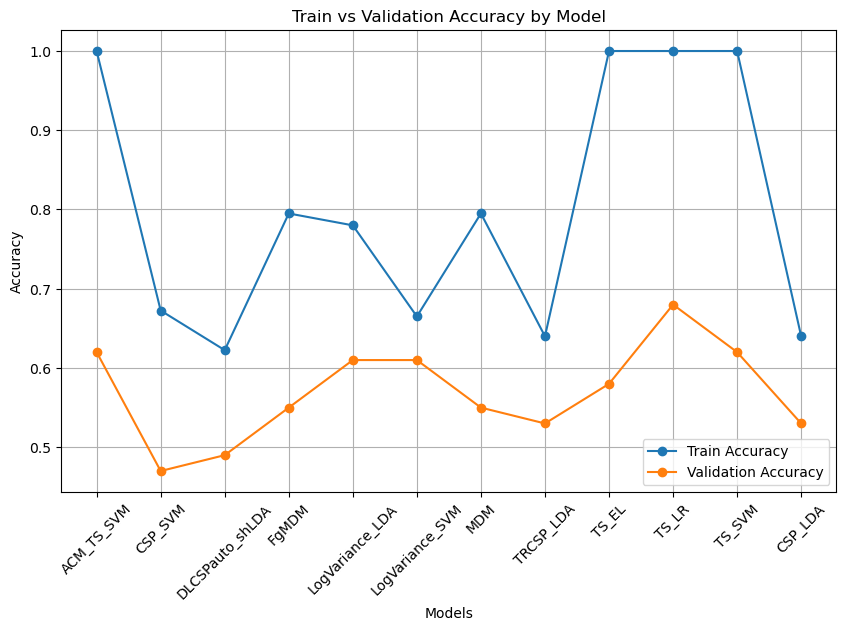

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select the mean row for train and validation accuracies
train_acc = df.loc['mean'].filter(like='train_accuracy')
val_acc = df.loc['mean'].filter(like='val_accuracy')

# Plotting
plt.figure(figsize=(10,6))
plt.plot(train_acc.index.get_level_values(0), train_acc.values, marker='o', label='Train Accuracy')
plt.plot(val_acc.index.get_level_values(0), val_acc.values, marker='o', label='Validation Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy by Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


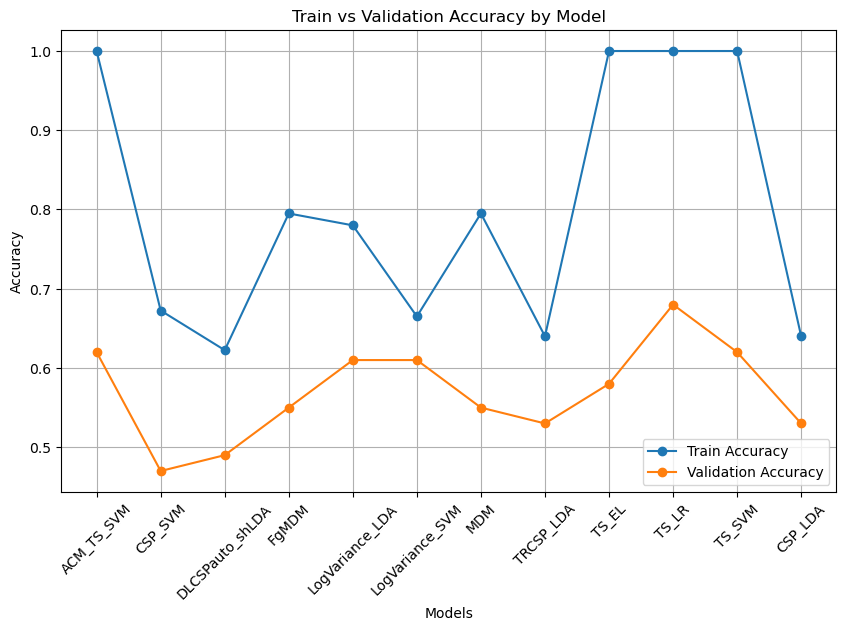

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select the mean row for train and validation accuracies
train_acc = df.loc['mean'].filter(like='train_accuracy')
val_acc = df.loc['mean'].filter(like='val_accuracy')

# Plotting
plt.figure(figsize=(10,6))
plt.plot(train_acc.index.get_level_values(0), train_acc.values, marker='o', label='Train Accuracy')
plt.plot(val_acc.index.get_level_values(0), val_acc.values, marker='o', label='Validation Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy by Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


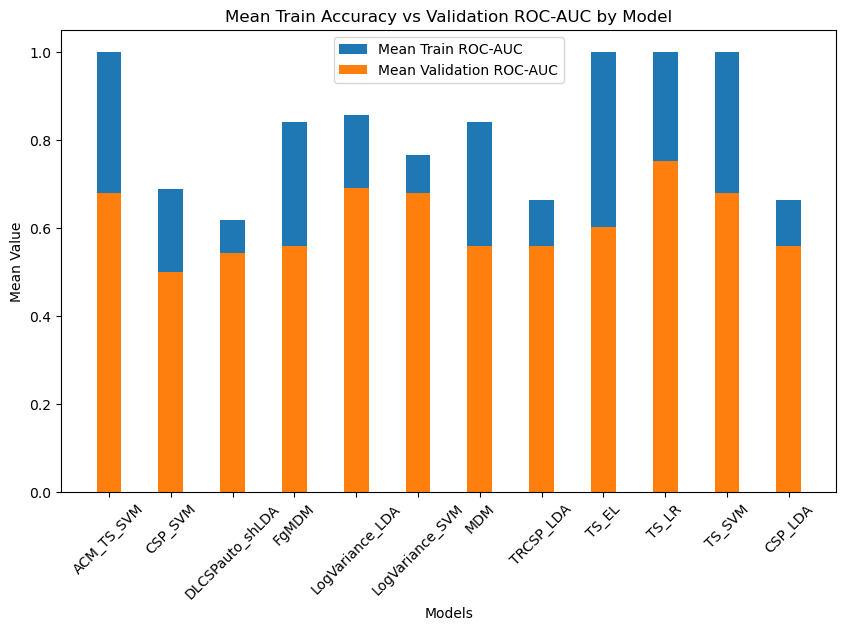

In [17]:
# Select mean row for accuracies and ROC-AUC
mean_train_acc = df.loc['mean'].filter(like='train_roc_auc')
mean_val_auc = df.loc['mean'].filter(like='val_roc_auc')

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(mean_train_acc.index.get_level_values(0), mean_train_acc.values, width=0.4, label='Mean Train ROC-AUC')
plt.bar(mean_val_auc.index.get_level_values(0), mean_val_auc.values, width=0.4, label='Mean Validation ROC-AUC')

plt.xlabel('Models')
plt.ylabel('Mean Value')
plt.title('Mean Train Accuracy vs Validation ROC-AUC by Model')
plt.xticks(rotation=45)
plt.legend()
plt.show()


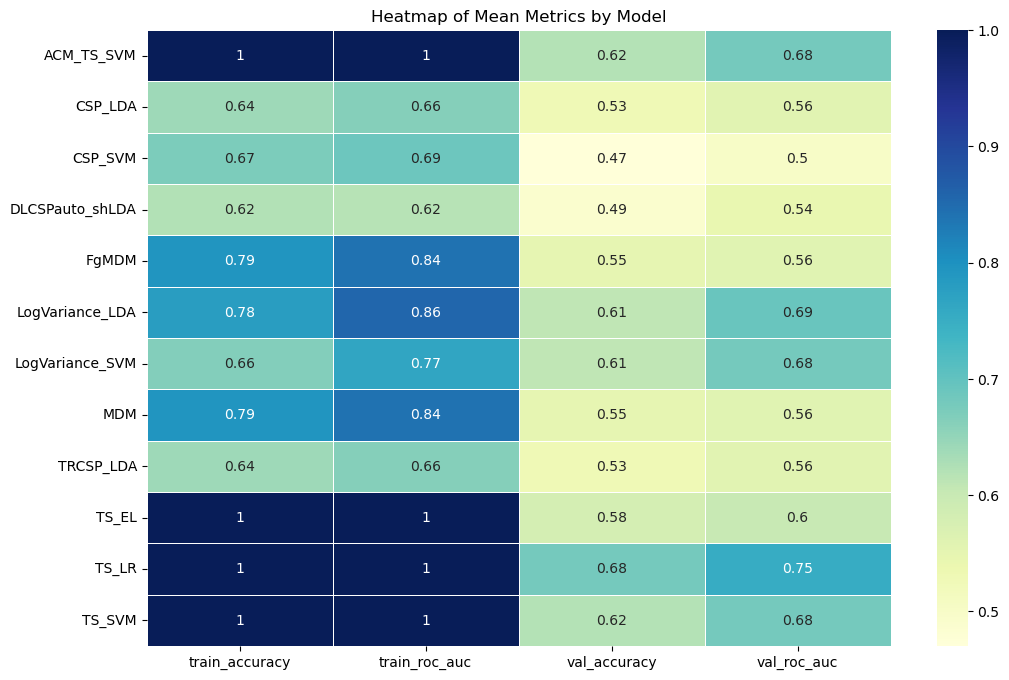

In [18]:
import seaborn as sns

# Select the 'mean' row for all metrics
mean_metrics = df.loc['mean']

# Reshape the DataFrame for heatmap
mean_metrics_df = mean_metrics.unstack()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(mean_metrics_df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Mean Metrics by Model')
plt.show()


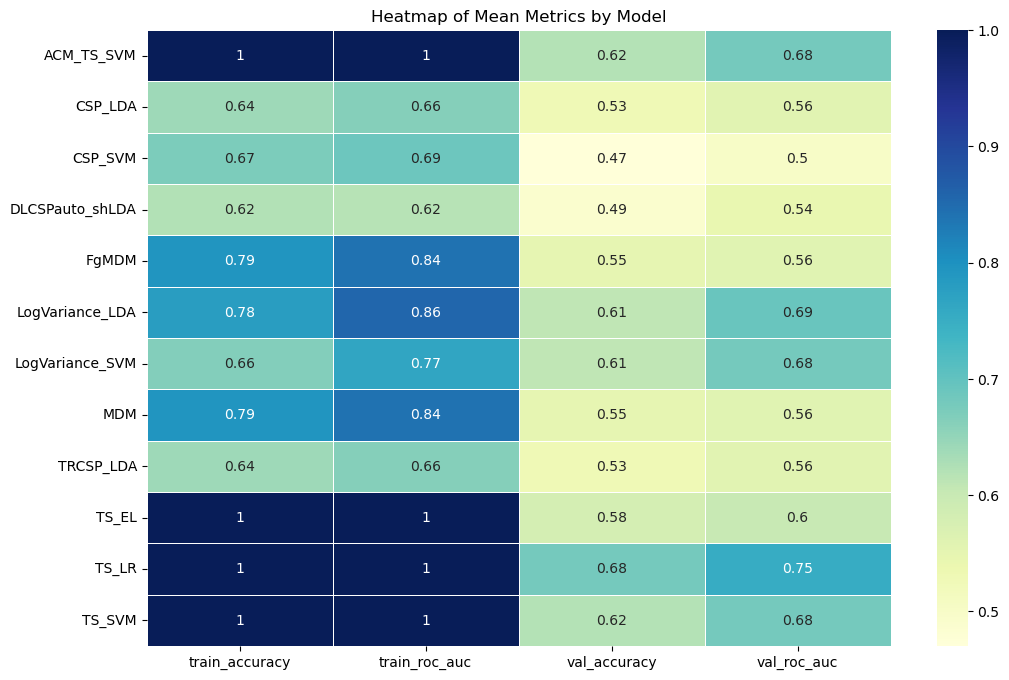

In [19]:
import seaborn as sns

# Select the 'mean' row for all metrics
mean_metrics = df.loc['mean']

# Reshape the DataFrame for heatmap
mean_metrics_df = mean_metrics.unstack()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(mean_metrics_df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Mean Metrics by Model')
plt.show()


## Ml pipelines

In [20]:
import pandas as pd

df = pd.DataFrame({(model, metric): values 
                   for model, metrics in results.items() 
                   if metrics is not None  # Check if metrics is not None
                   for metric, values in metrics.items() 
                   if values is not None})  # Skip None values
df.drop(columns=df['ACM_TS_SVM'].columns[4:], inplace=True,level=1)
df = pd.concat([df, pd.DataFrame(df.mean(), columns=["mean"]).T])

In [21]:
df

ACM_TS_SVM                                               CSP_SVM  \
     train_accuracy train_roc_auc val_accuracy val_roc_auc train_accuracy   
0               1.0           1.0         0.45        0.53         0.5750   
1               1.0           1.0         0.65        0.67         0.6375   
2               1.0           1.0         0.60        0.70         0.6500   
3               1.0           1.0         0.75        0.78         0.9250   
4               1.0           1.0         0.65        0.72         0.5750   
mean            1.0           1.0         0.62        0.68         0.6725   

                                            DLCSPauto_shLDA                \
     train_roc_auc val_accuracy val_roc_auc  train_accuracy train_roc_auc   
0         0.588750         0.45        0.41          0.4500      0.476875   
1         0.636250         0.50        0.45          0.5875      0.541875   
2         0.637500         0.35        0.42          0.5625      0.570000   
3         0.965625         0.70        0.77          0.9250      0.948125   
4         0.611250         0.35        0.45          0.5875      0.557500   
mean      0.687875         0.47        0.50          0.6225      0.618875   

      ...        TS_LR                     TS_SVM                             \
      ... val_accuracy val_roc_auc train_accuracy train_roc_auc val_accuracy   
0     ...         0.60       0.700            1.0           1.0         0.45   
1     ...         0.65       0.730            1.0           1.0         0.65   
2     ...         0.70       0.710            1.0           1.0         0.60   
3     ...         0.70       0.760            1.0           1.0         0.75   
4     ...         0.75       0.860            1.0           1.0         0.65   
mean  ...         0.68       0.752            1.0           1.0         0.62   

                        CSP_LDA                                         
     val_roc_auc train_accuracy train_roc_auc val_accuracy val_roc_auc  
0           0.53         0.5000      0.521250         0.70       0.700  
1           0.67         0.6125      0.626875         0.45       0.510  
2           0.70         0.6125      0.624375         0.45       0.420  
3           0.78         0.9000      0.953125         0.55       0.660  
4           0.72         0.5750      0.590000         0.50       0.500  
mean        0.68         0.6400      0.663125         0.53       0.558  

[6 rows x 48 columns]

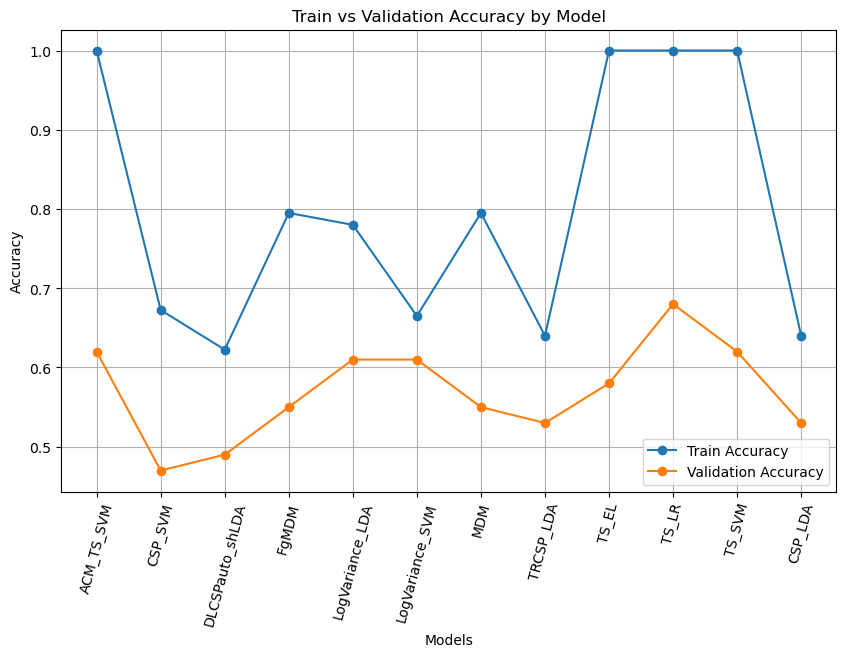

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Select the mean row for train and validation accuracies
train_acc = df.loc['mean'].filter(like='train_accuracy')
val_acc = df.loc['mean'].filter(like='val_accuracy')

# Plotting
plt.figure(figsize=(10,6))
plt.plot(train_acc.index.get_level_values(0), train_acc.values, marker='o', label='Train Accuracy')
plt.plot(val_acc.index.get_level_values(0), val_acc.values, marker='o', label='Validation Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy by Model')
plt.xticks(rotation=75)
plt.legend()
plt.grid(True)
plt.show()


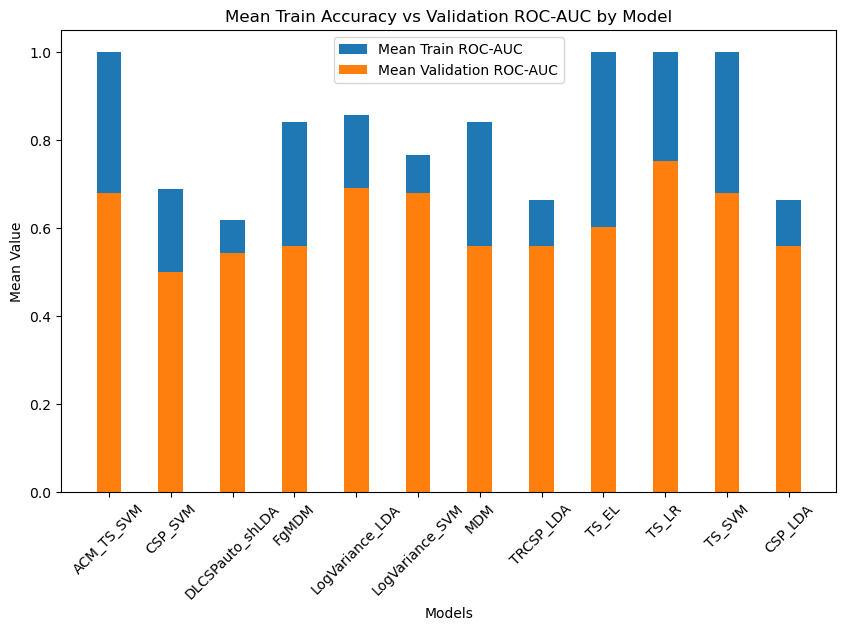

In [23]:
# Select mean row for accuracies and ROC-AUC
mean_train_acc = df.loc['mean'].filter(like='train_roc_auc')
mean_val_auc = df.loc['mean'].filter(like='val_roc_auc')

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(mean_train_acc.index.get_level_values(0), mean_train_acc.values, width=0.4, label='Mean Train ROC-AUC')
plt.bar(mean_val_auc.index.get_level_values(0), mean_val_auc.values, width=0.4, label='Mean Validation ROC-AUC')

plt.xlabel('Models')
plt.ylabel('Mean Value')
plt.title('Mean Train Accuracy vs Validation ROC-AUC by Model')
plt.xticks(rotation=45)
plt.legend()
plt.show()


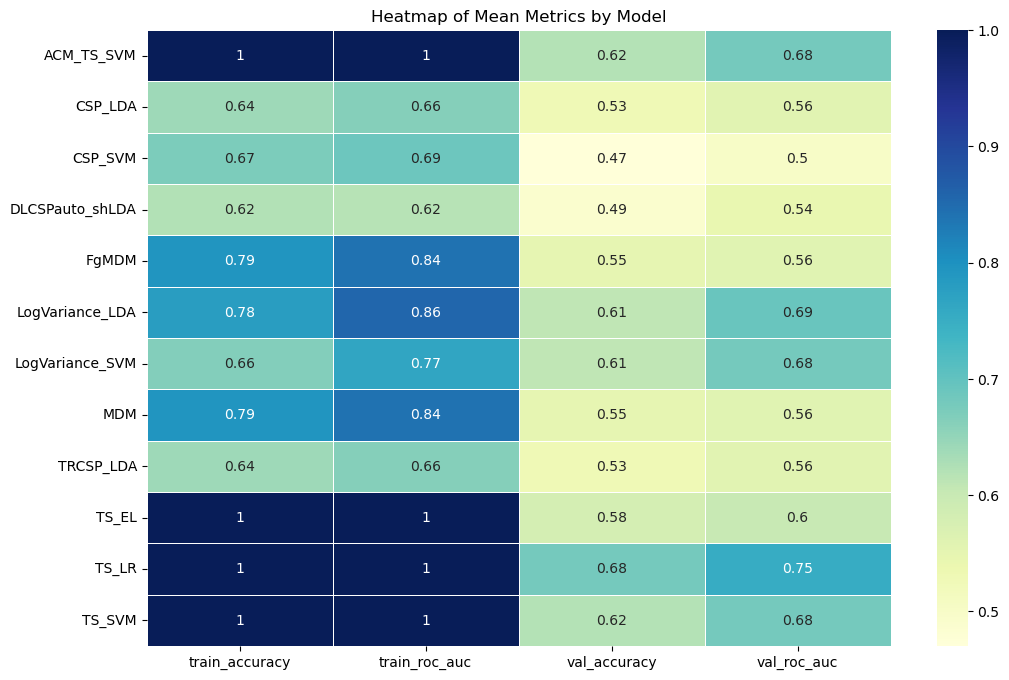

In [24]:
import seaborn as sns

# Select the 'mean' row for all metrics
mean_metrics = df.loc['mean']

# Reshape the DataFrame for heatmap
mean_metrics_df = mean_metrics.unstack()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(mean_metrics_df, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Mean Metrics by Model')
plt.show()